In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# Load the Data and Extract useful data

We will extract the data and try to concatenate the data.

In [2]:
df_train = pd.read_csv('csvfiles/train.csv')
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
df_train.date = pd.to_datetime(df_train.date)
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df_oil = pd.read_csv('csvfiles/oil.csv')
df_oil.date = pd.to_datetime(df_oil.date)
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [5]:
df_stores = pd.read_csv('csvfiles/stores.csv')
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
df_transactions = pd.read_csv('csvfiles/transactions.csv')
df_transactions.date = pd.to_datetime(df_transactions.date)
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


For the holiday dataset, we just focus on national holidays for simplification

In [7]:
df_holiday = pd.read_csv('csvfiles/holidays_events.csv', parse_dates = ['date'], infer_datetime_format = True, index_col = 'date')
df_holiday = df_holiday[df_holiday.locale == 'National']  
df_holiday = df_holiday.groupby(df_holiday.index).first()
df_holiday['national_holiday'] = 1
df_holiday.head()

,type,locale,locale_name,description,transferred,national_holiday
date,,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,False,1
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True,1
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False,1
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,False,1
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,False,1


In [8]:
df_test = pd.read_csv('csvfiles/test.csv')

df_test.date = pd.to_datetime(df_test.date)
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
df_concat_train_test = pd.concat([df_train, df_test])
df_concat_train_test.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


We will concatenate the oil prices for each corresponding day and fill the null value with the median oil prices.

In [10]:
df_merge_train_oil = pd.merge(df_concat_train_test,df_oil, on=['date'], how='left')
df_merge_train_oil['dcoilwtico'] = df_merge_train_oil['dcoilwtico'].fillna(df_merge_train_oil['dcoilwtico'].median())
df_merge_train_oil = df_merge_train_oil.rename(columns={'dcoilwtico': 'oilprice'})
df_merge_train_oil.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19
4,4,2013-01-01,1,BOOKS,0.0,0,53.19


In [11]:
df_merge_train_oil_stores = pd.merge(df_merge_train_oil, df_stores, on=['store_nbr'], how = 'left')
df_merge_train_oil_stores.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,13


In [12]:
df_merge_train_oil_stores_transactions = pd.merge(df_merge_train_oil_stores, df_transactions, on=['date', 'store_nbr'], how = 'left')
df_merge_train_oil_stores_transactions['transactions'] = df_merge_train_oil_stores_transactions['transactions'].fillna(0)
df_merge_train_oil_stores_transactions['dayofweek'] = df_merge_train_oil_stores_transactions.date.dt.dayofweek
df_merge_train_oil_stores_transactions['month'] = df_merge_train_oil_stores_transactions.date.dt.month
df_merge_train_oil_stores_transactions['year'] = df_merge_train_oil_stores_transactions.date.dt.year
df_merge_train_oil_stores_transactions['dayofyear'] = df_merge_train_oil_stores_transactions.date.dt.dayofyear
df_merge_train_oil_stores_transactions['day'] = df_merge_train_oil_stores_transactions.date.dt.day
df_merge_train_oil_stores_transactions.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions,dayofweek,month,year,dayofyear,day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1


In [13]:
df_merge_train_oil_stores_transactions['days_block_num'] = (df_merge_train_oil_stores_transactions['date'] - df_merge_train_oil_stores_transactions['date'][0])/np.timedelta64(1, 'D')
df_merge_train_oil_stores_transactions['days_block_num'] = df_merge_train_oil_stores_transactions['days_block_num'].astype('int16')
df_merge_train_oil_stores_transactions['month_block_num'] = (df_merge_train_oil_stores_transactions['date'] - df_merge_train_oil_stores_transactions['date'][0])/np.timedelta64(1, 'M')
df_merge_train_oil_stores_transactions['month_block_num'] = df_merge_train_oil_stores_transactions['month_block_num'].apply(np.floor).astype('int16')
df_merge_train_oil_stores_transactions.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions,dayofweek,month,year,dayofyear,day,days_block_num,month_block_num
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0


In [14]:
df_merge_train_oil_stores_transactions_holiday = df_merge_train_oil_stores_transactions.merge(df_holiday[['national_holiday']], on=['date'], how='left')
df_merge_train_oil_stores_transactions_holiday['national_holiday'] = df_merge_train_oil_stores_transactions_holiday['national_holiday'].fillna(0.0)
df_merge_train_oil_stores_transactions_holiday.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions,dayofweek,month,year,dayofyear,day,days_block_num,month_block_num,national_holiday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0,1.0
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0,1.0
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0,1.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0,1.0
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,13,0.0,1,1,2013,1,1,0,0,1.0


# Plot the data

Let's plot our data to see the 'unseen' data that might help us to get a better understanding of the data and might help us to add new features to improve our data.

In [15]:
def plotdataforeachfamily(data):
    for i,j in enumerate(data['family'].unique()):
        if(i%2 == 0):
            fig, ax = plt.subplots(1,2,figsize = (20,4))
        data[data['family']==j].groupby(["date"]).sales.sum().plot(ax = ax[i%2], title = j, color='lightblue')

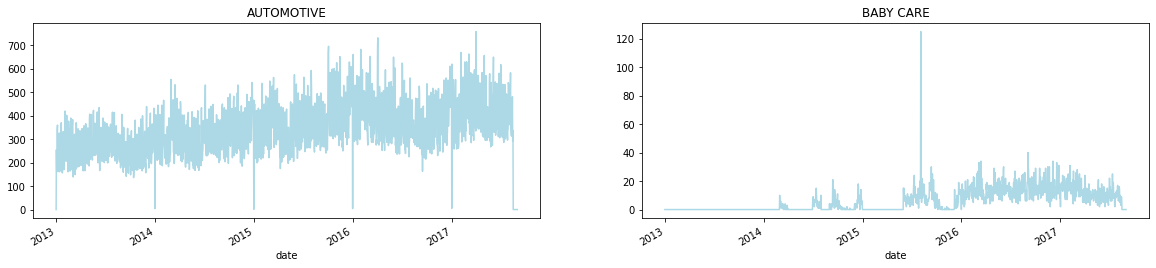

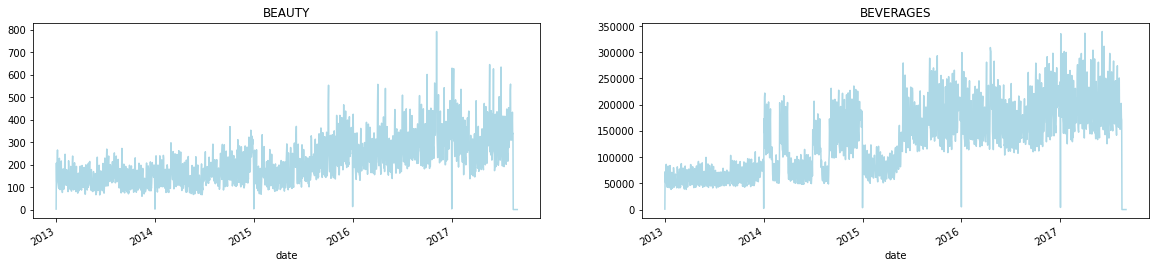

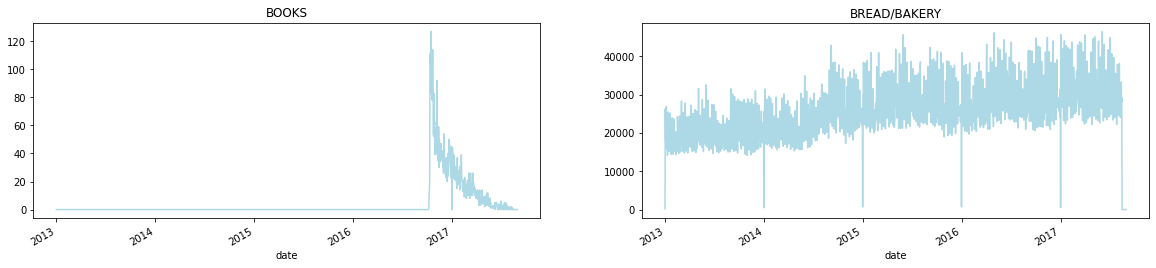

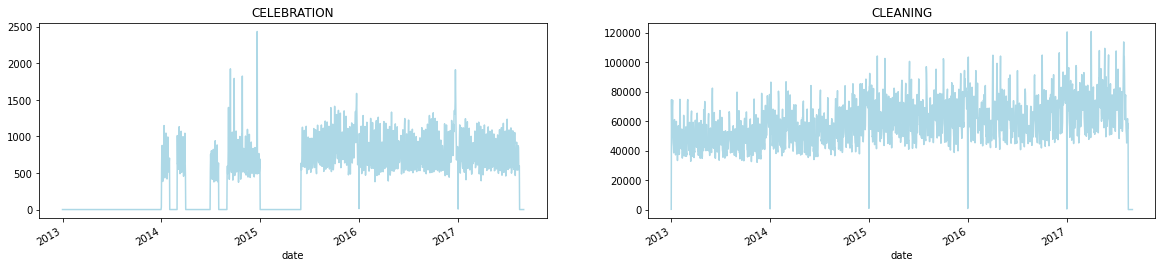

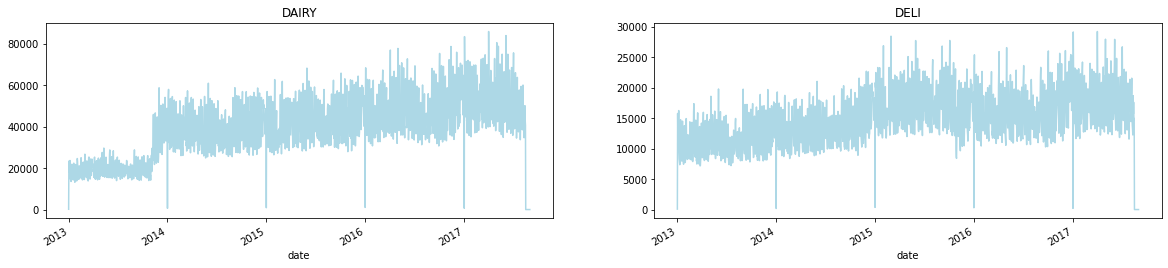

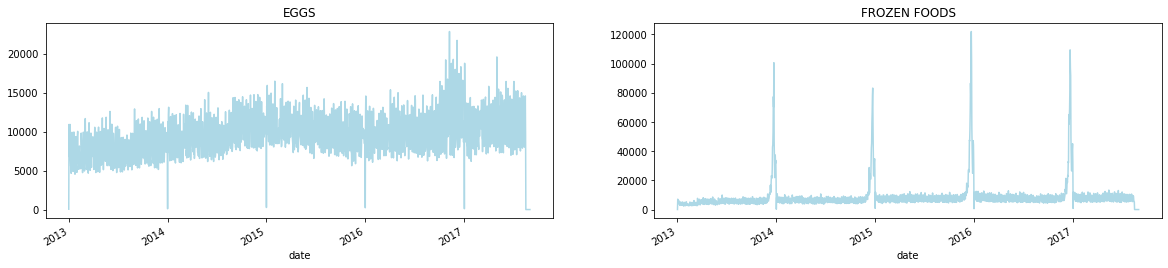

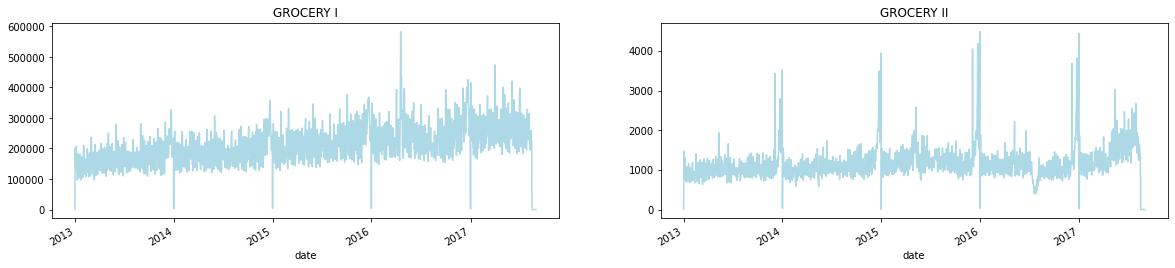

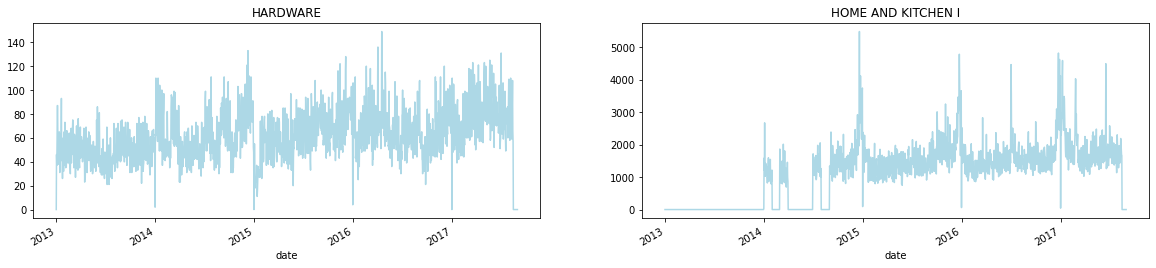

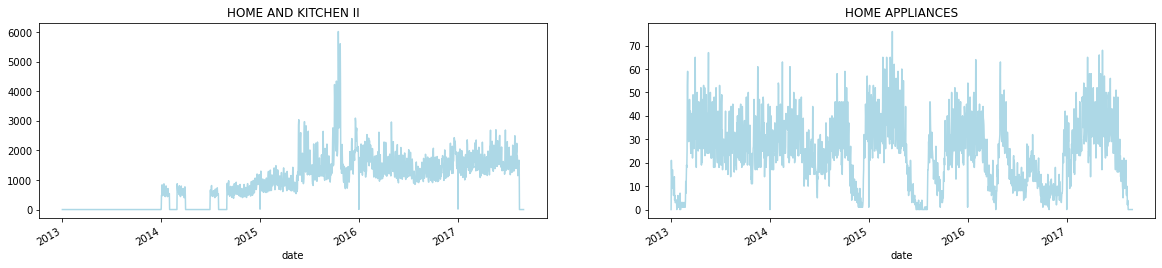

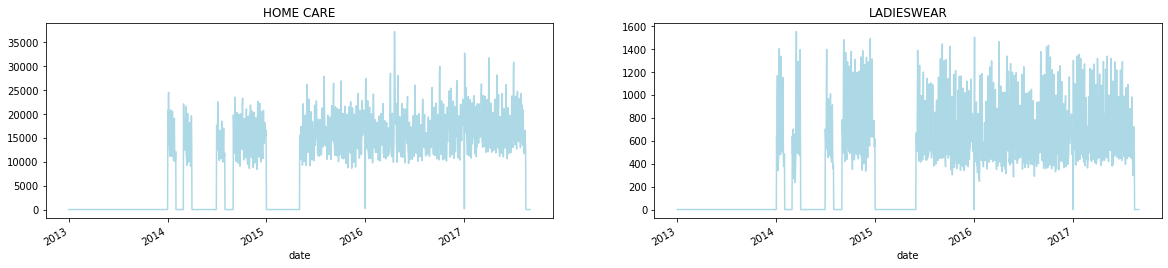

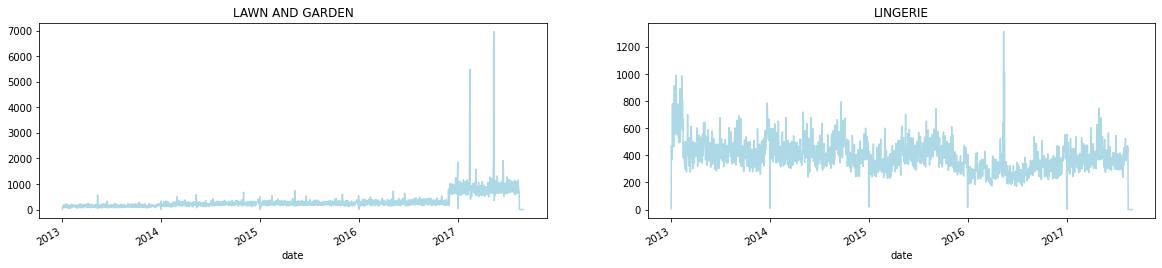

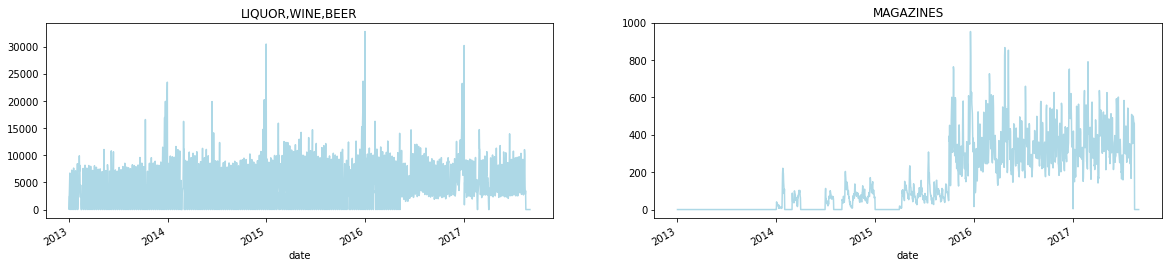

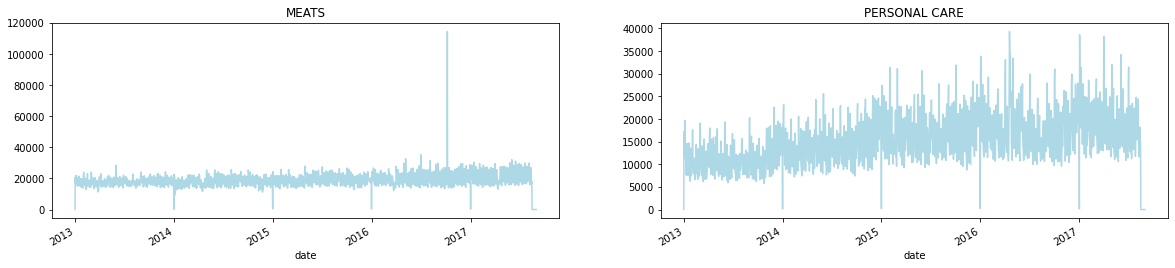

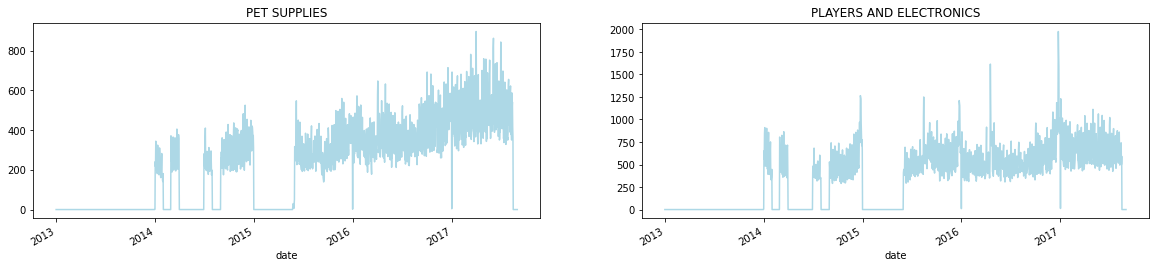

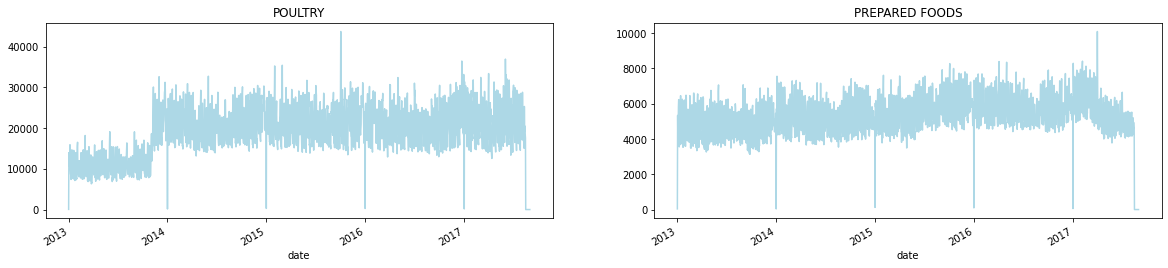

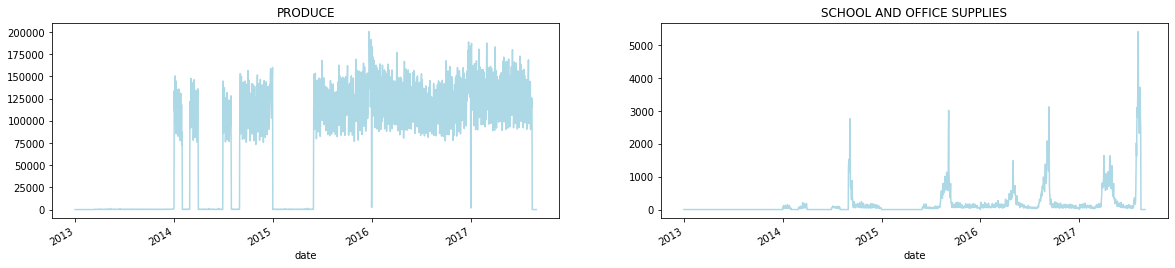

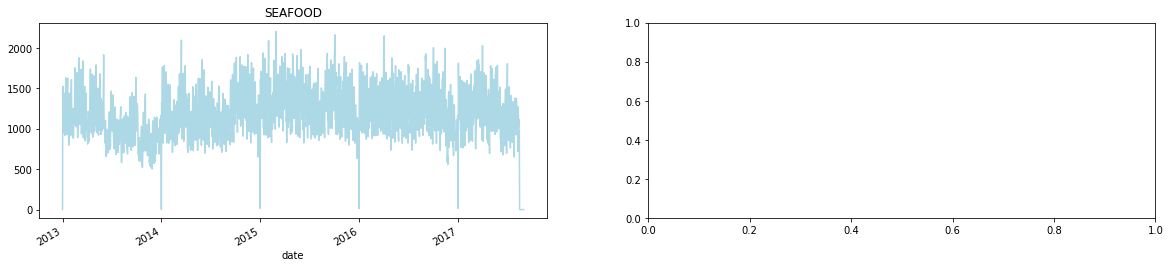

In [16]:
data = df_merge_train_oil_stores_transactions_holiday.copy()

plotdataforeachfamily(data)

From all the graphs above, each family gives a different pattern.

For example, for Liquor, Wine, Beer family, products show a significant uptick in sales around the end of the year (December month). Most likely, it's because people tend to buy the products at holiday events (Christmas for example, in December) rather than other events/days. 

Another example is Books family. The family shows that sales started sometime in 2016 (before, the sales were equal to zero or it also means that the product had not sold until 2016). But the sales have sharply decreased since. It might be because people are not interested in buying the books, the book's seller wants to sell the books for a particular time (the books already ended up their printing), many store stop selling books products because certain things, or any other reasons.

School and office supplies also give a unique pattern. From the graph, we can see that the sales sharply increased around the start and middle of the year (around May - April and August-September). We can conclude that it's because, on that particular date, a new semester has started for schoolers.

There might be a case that the store didn't sell a particular family/product or had already stopped selling certain products. 
Let's say store A sells Liquor, Wine, Beer products, then it has a low probability that store A also sells pet supplies, because both of the products have 'very different value.'
Also, there might be a store that has already stopped the sale of certain products, for example, let's see books family again. Certain stores may stop selling books products because they might be given very low profit, hard to sell, or any other reasons.

To check if a particular store either didn't sell certain products or stopped the sale of certain products, we can check their sales in the last few days.

We're going to check their sales for the last ten days. Suppose a particular store has 0 sales sum for ten consecutive days for a particular family/product. In that case, we can predict their sales for that family/product to 0 (zero) in our prediction later. We call this method as "Zero  Prediction" method.

Note: Remember that we see that School and office supplies products have a seasonal pattern, then this family will exclude from our "Zero Prediction."

## Zero Prediction

In [17]:
zero_prediction = []
data = df_merge_train_oil_stores_transactions_holiday[df_merge_train_oil_stores_transactions_holiday['date']<'2017-08-16'].copy()

data = data.groupby(["store_nbr","family"]).tail(10+1)
data = data.groupby(["store_nbr","family"]).sales.sum().reset_index()
data = data[(data['sales'] == 0) & (data['family'] != "SCHOOL AND OFFICE SUPPLIES")].drop("sales",axis = 1)
print(data.shape)

for i in range(0, len(data)):
    zero_prediction.append(
        pd.DataFrame({
            "date":pd.date_range("2017-08-16", "2017-08-31").tolist(),
            "store_nbr":data['store_nbr'].iloc[i],
            "family":data['family'].iloc[i],
            "sales":0.0
        })
    )
zero_prediction = pd.concat(zero_prediction)
zero_prediction.head()

(139, 2)


,date,store_nbr,family,sales
0,2017-08-16,1,BABY CARE,0.0
1,2017-08-17,1,BABY CARE,0.0
2,2017-08-18,1,BABY CARE,0.0
3,2017-08-19,1,BABY CARE,0.0
4,2017-08-20,1,BABY CARE,0.0


Now, let's pay attention to the stores.

We have a data that has already got captured from 2013 until September 2017.

There might be a store that just established in between that time. So we need to find the opening time from all the stores.

Then we will use the later date of the opening time to become our starting point for forecasting.

We need to do this to prevent large bias (error) in our prediction.

In [18]:
data = df_merge_train_oil_stores_transactions_holiday.copy()

data = data.groupby(["date","store_nbr"]).sales.sum().reset_index()
data = data[data["sales"] > 0].groupby("store_nbr")[["date"]].min().sort_values(by="date",ascending = False)
data.head(5)

,date
store_nbr,
52,2017-04-20
22,2015-10-09
42,2015-08-21
21,2015-07-24
29,2015-03-20


From the table above, we can see that store 52 has the latest opening time from all the stores, and it was opened on 2017-04-20. It means data that we will use for our forecasting started on 2017-04-20.

But we will not cut the data here immediately. We still need the data before 2017-04-20 for our lag feature analysis.
We will cut the data later in the prediction section.

# Lag data analysis

For this forecasting project, we will use lag features as our additional features to reduce our error in the prediction/modeling process.
But we need to know the lag feature values that we will use.

To answer the question, let's plot the PCF sales for each family (based on sales median in days-terms and month-terms)

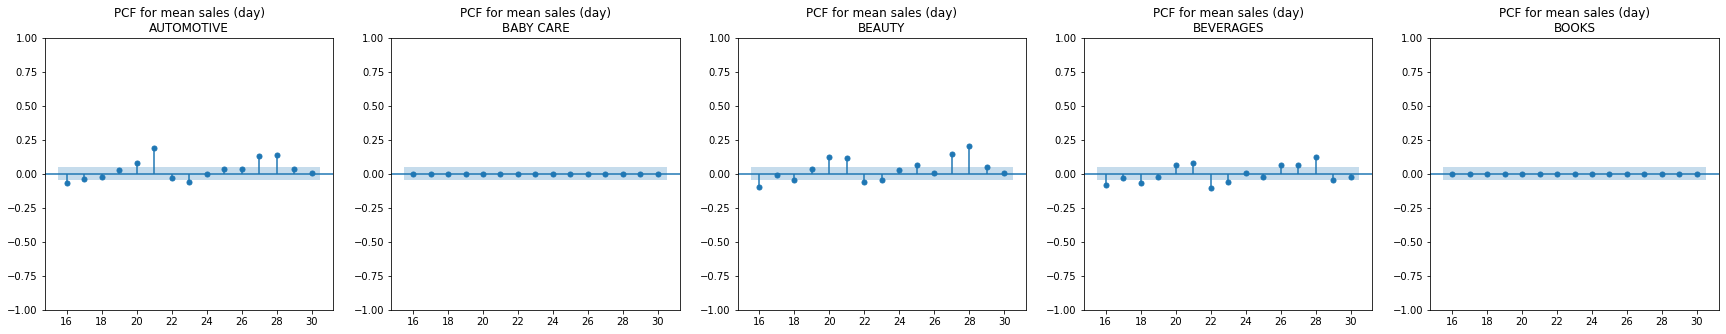

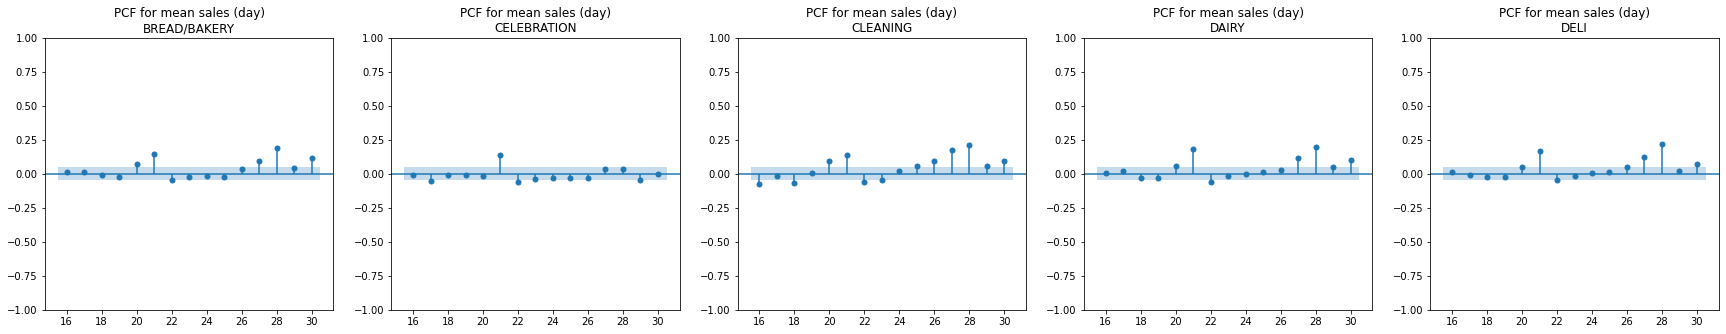

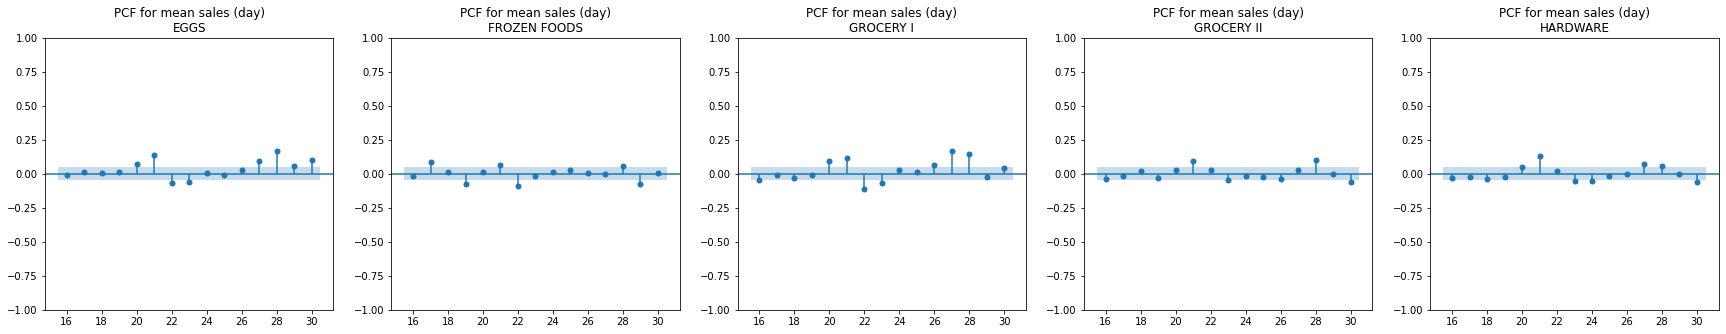

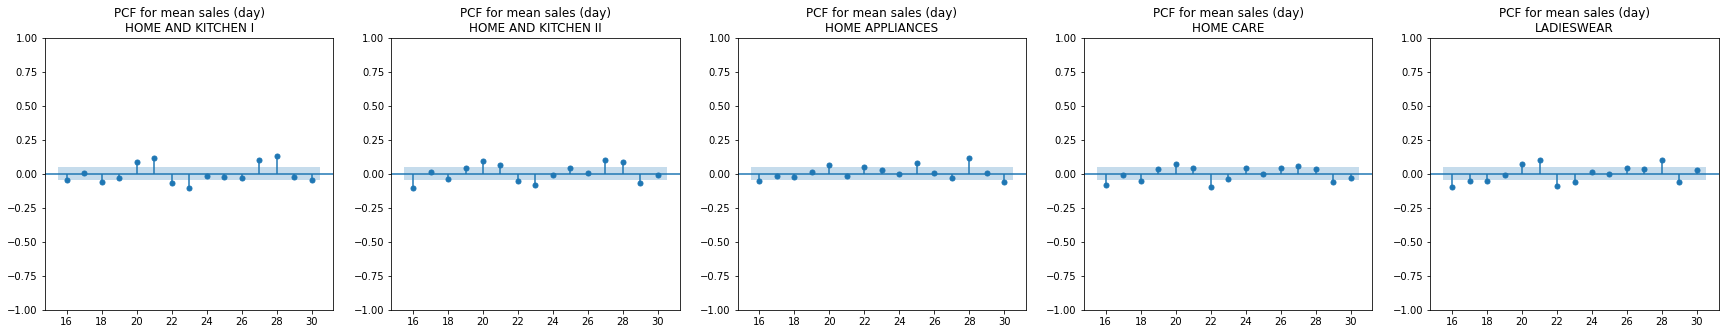

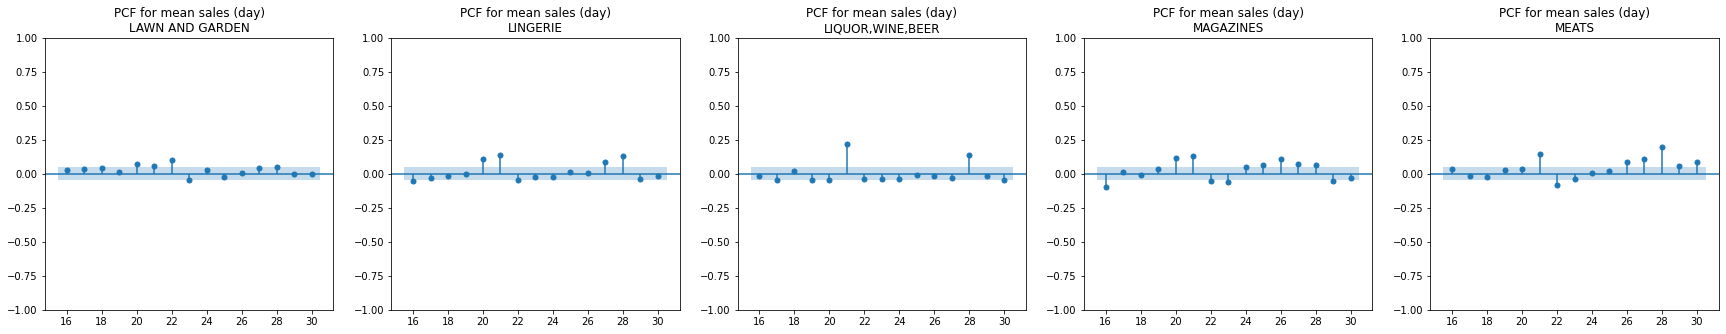

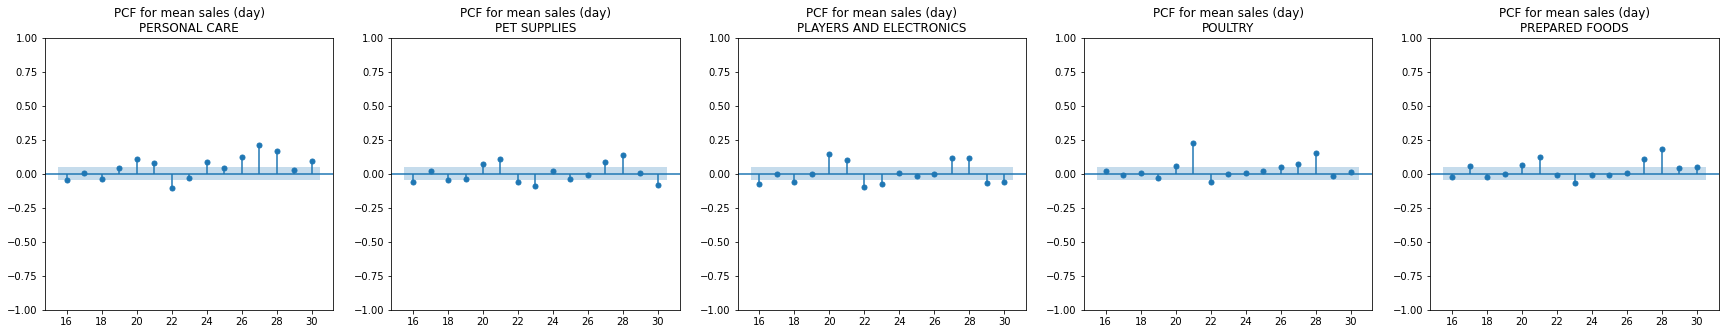

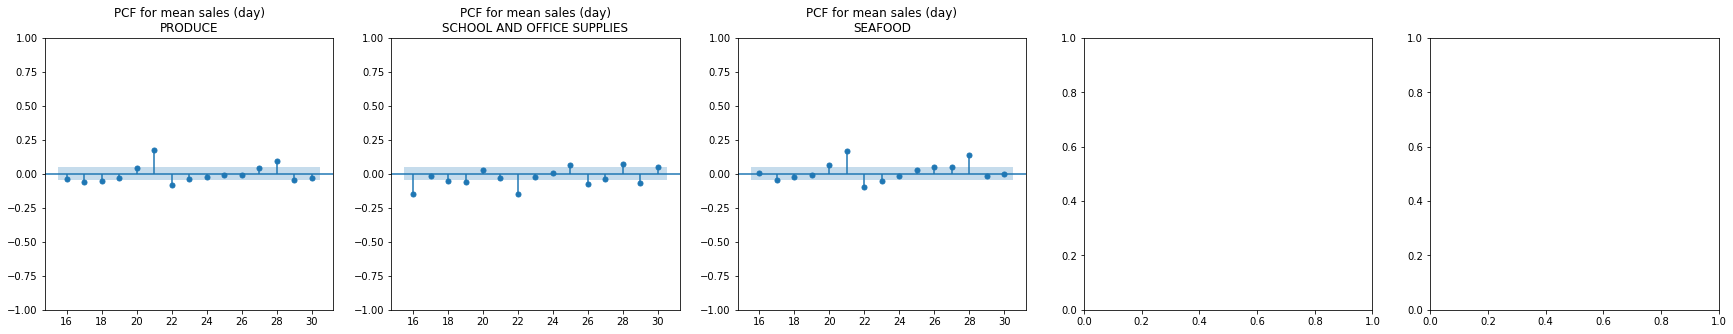

In [20]:
import statsmodels.api as sm

data = df_merge_train_oil_stores_transactions_holiday.copy()

data = data[(data.sales.notnull())].groupby(["date", "family"]).sales.median().reset_index().set_index("date")
for num, i in enumerate(data.family.unique()):
    if(num%5==0):
        fig, ax = plt.subplots(1,5,figsize=(30,5))
    temp = data[(data.family == i)]
    sm.graphics.tsa.plot_pacf(temp.sales, method='ols', lags=[k for k in range(16,30+1)], ax=ax[num%5], title = "PCF for mean sales (day)\n" + i)

Remember that we must forecast for the next 15 days, so our lags must start from 16.
From the PCF plot above, we will choose 20, 21, 22, 27, and 28 days as our lags.

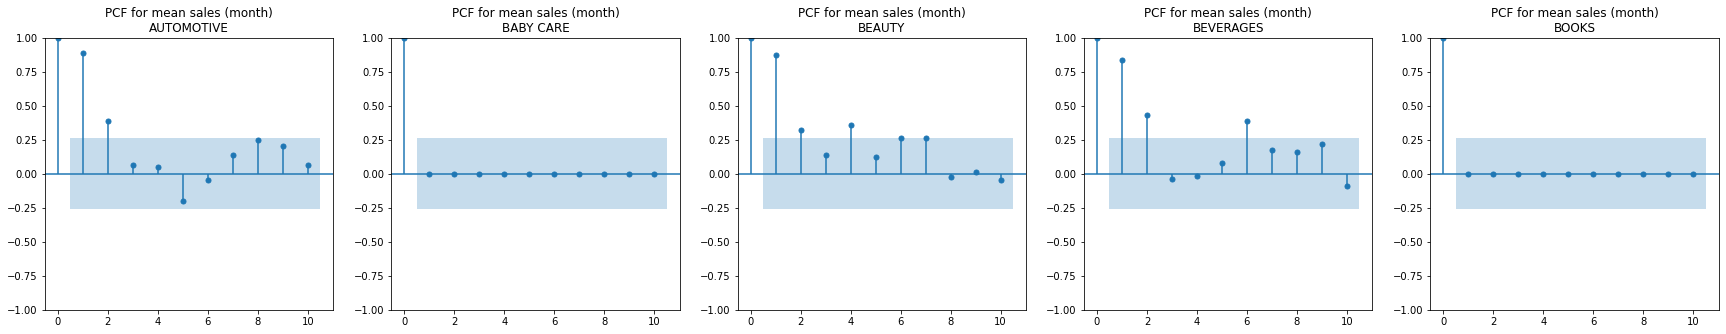

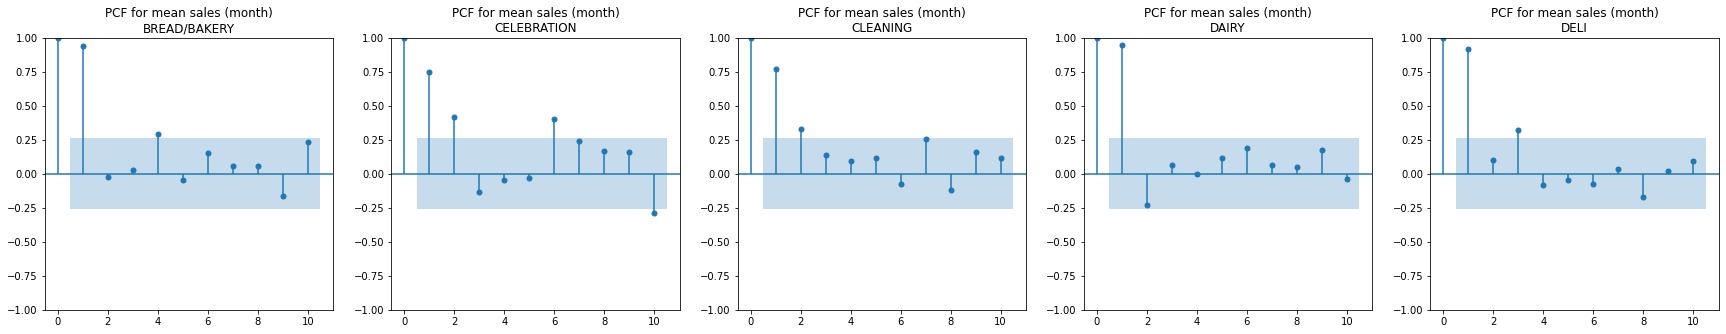

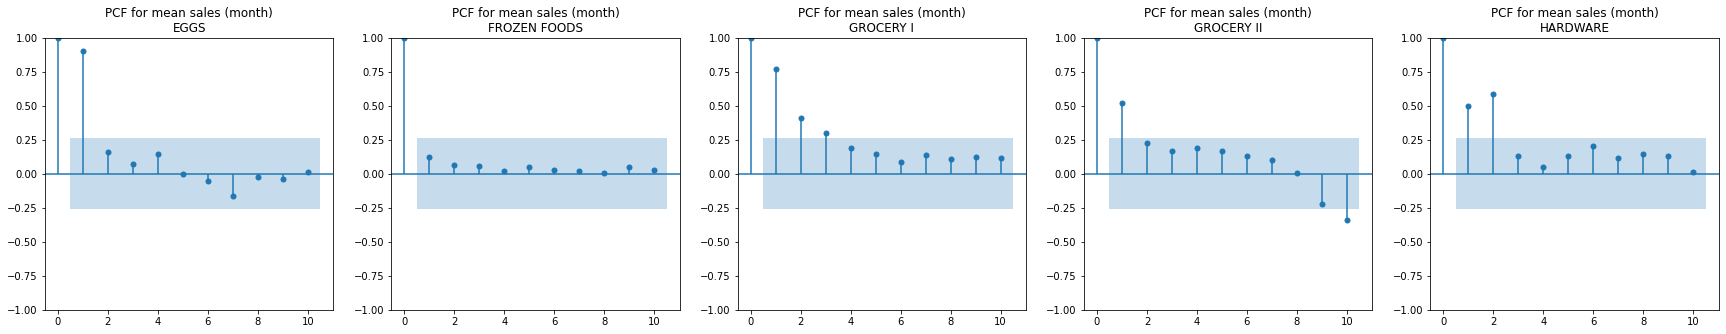

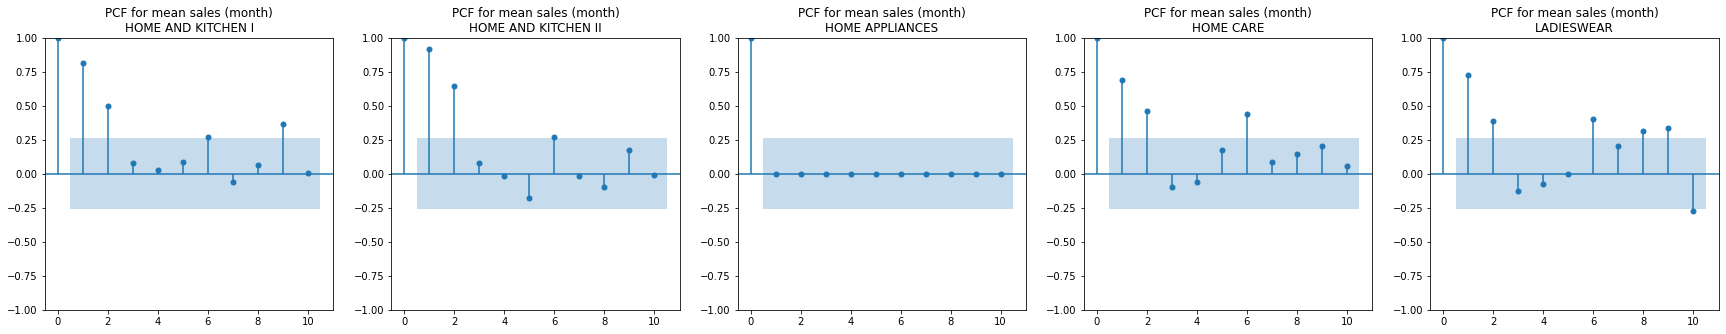

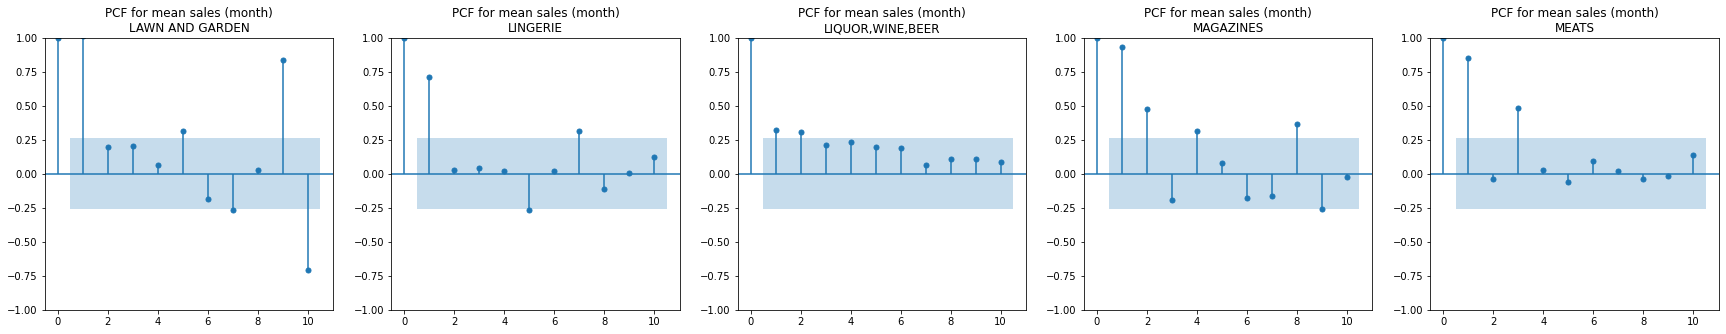

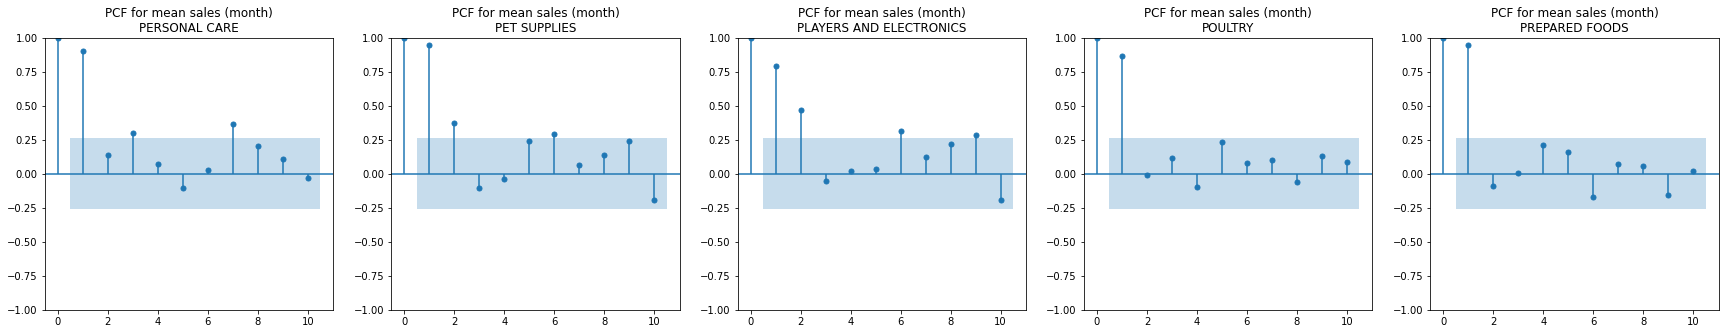

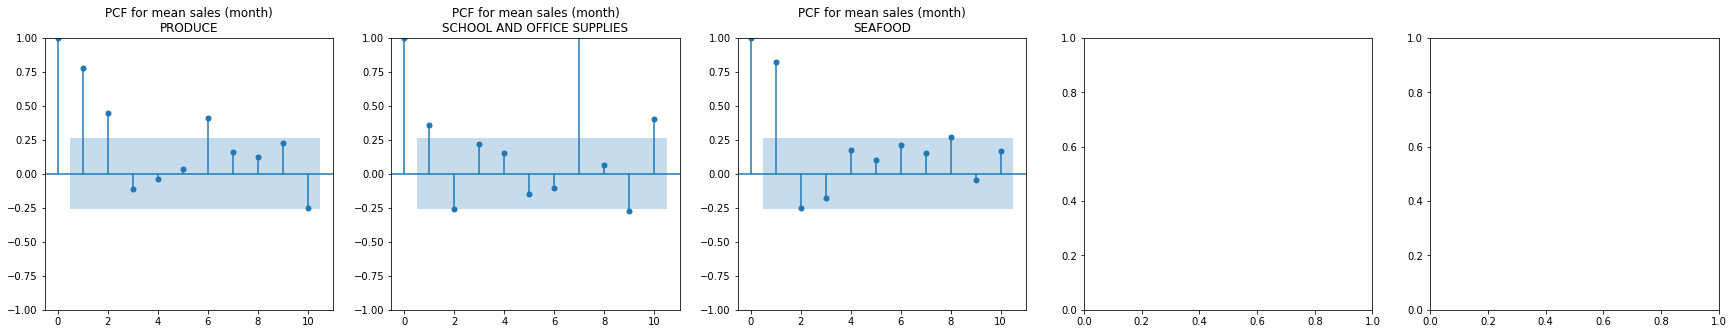

In [21]:
import statsmodels.api as sm

data = df_merge_train_oil_stores_transactions_holiday.copy()

data = data[(data.sales.notnull())].groupby(["month_block_num", "family"]).sales.median().reset_index().set_index("month_block_num")
for num, i in enumerate(data.family.unique()):
    if(num%5==0):
        fig, ax = plt.subplots(1,5,figsize=(30,5))
    temp = data[(data.family == i)]
    sm.graphics.tsa.plot_pacf(temp.sales, method='ols', lags=[k for k in range(11)], ax=ax[num%5], title = "PCF for mean sales (month)\n" + i)

From the PCF plot above, we will choose 1,2,3, and 6 months as our lags.

In [22]:
#Sales median each day

data = df_merge_train_oil_stores_transactions_holiday.copy()

data_sales_median = data[(data.sales.notnull())].groupby(["date", "family"]).sales.median().reset_index().set_index("date")

data_sales_median.columns = ['family','sales_median']

data_sales_median

,family,sales_median
date,,
2013-01-01,AUTOMOTIVE,0.000000
2013-01-01,BABY CARE,0.000000
2013-01-01,BEAUTY,0.000000
2013-01-01,BEVERAGES,0.000000
2013-01-01,BOOKS,0.000000
...,...,...
2017-08-15,POULTRY,219.013500
2017-08-15,PREPARED FOODS,69.932498
2017-08-15,PRODUCE,2052.700000


In [23]:
#Sales median each month

data = df_merge_train_oil_stores_transactions_holiday.copy()

data_sales_median_month = data[(data.sales.notnull())].groupby(["month_block_num", "family"]).sales.median().reset_index().set_index("month_block_num")

data_sales_median_month.columns = ['family','sales_median_month']

data_sales_median_month

,family,sales_median_month
month_block_num,,
0,AUTOMOTIVE,3.0000
0,BABY CARE,0.0000
0,BEAUTY,1.0000
0,BEVERAGES,697.0000
0,BOOKS,0.0000
...,...,...
55,POULTRY,232.9255
55,PREPARED FOODS,68.1695
55,PRODUCE,1546.0655


Remember that we have 'oilprice' feature in our dataset.
Then we will include that feature in our 'lag features.' We still don't know whether these features will help us to improve our prediction, but for now, let's do it!

In [24]:
#Oilprice median each month

data = df_merge_train_oil_stores_transactions_holiday.copy()

data_oilprice_median = data[(data.oilprice.notnull())].groupby(["month_block_num", "family"]).oilprice.median().reset_index().set_index("month_block_num")

data_oilprice_median.columns = ['family','oilprice_median']

data_oilprice_median

,family,oilprice_median
month_block_num,,
0,AUTOMOTIVE,93.21
0,BABY CARE,93.21
0,BEAUTY,93.21
0,BEVERAGES,93.21
0,BOOKS,93.21
...,...,...
55,POULTRY,48.59
55,PREPARED FOODS,48.59
55,PRODUCE,48.59


In [25]:
data = df_merge_train_oil_stores_transactions_holiday.copy()


merge_default_with_salesoilprices = pd.merge(data, data_sales_median, on=['date', 'family'], how='left')
merge_default_with_salesoilprices = pd.merge(merge_default_with_salesoilprices, data_oilprice_median, on=['month_block_num', 'family'], how='left')
merge_default_with_salesoilprices = pd.merge(merge_default_with_salesoilprices, data_sales_median_month, on=['month_block_num', 'family'], how='left')

merge_default_with_salesoilprices

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,...,month,year,dayofyear,day,days_block_num,month_block_num,national_holiday,sales_median,oilprice_median,sales_median_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,...,1,2013,1,1,0,0,1.0,0.0,93.21,3.0000
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,...,1,2013,1,1,0,0,1.0,0.0,93.21,0.0000
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,...,1,2013,1,1,0,0,1.0,0.0,93.21,1.0000
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,...,1,2013,1,1,0,0,1.0,0.0,93.21,697.0000
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,...,1,2013,1,1,0,0,1.0,0.0,93.21,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,...,8,2017,243,31,1703,55,0.0,NaN,48.59,232.9255
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,...,8,2017,243,31,1703,55,0.0,NaN,48.59,68.1695
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,...,8,2017,243,31,1703,55,0.0,NaN,48.59,1546.0655
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,...,8,2017,243,31,1703,55,0.0,NaN,48.59,1.0000


In [26]:
def lag_feature_days(df, lags, col):
    tmp = df[['days_block_num','store_nbr','family',col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['days_block_num','store_nbr','family', col+'_lag_'+str(i)]
        shifted['days_block_num'] += i
        df = pd.merge(df, shifted, on=['days_block_num','store_nbr','family'], how='left')
    return df

def lag_feature_month(df, lags, col):
    tmp = df[['month_block_num','store_nbr','family', col]]
    for i in lags:
        shifted = tmp.copy()
        shifted.columns = ['month_block_num','store_nbr','family', col+'_lag_'+str(i)]
        shifted['month_block_num'] += i
        shifted_drop_duplicates = shifted.drop_duplicates(keep='first')
        df = pd.merge(df, shifted_drop_duplicates, on=['month_block_num','store_nbr','family'], how='left')
    return df

We can use the 'trial and error' or 'hyperparameter tuning' method to find our best lag values for the 'oilprice' and 'oilprice_median' features. 
Here, I'm using [1,2,3,7,14,21] lag values for the 'oilprice' feature and the same lag values as the 'sales_median_month' feature for the 'oilprice_median' feature ([1,2,3,6]).

In [27]:
merge_default_with_salesoilprices_add_lag_mediansalesoilprices = lag_feature_days(merge_default_with_salesoilprices, [20,21,22,27,28], 'sales_median')
merge_default_with_salesoilprices_add_lag_mediansalesoilprices = lag_feature_days(merge_default_with_salesoilprices_add_lag_mediansalesoilprices, [20,21,22,27,28], 'sales')
merge_default_with_salesoilprices_add_lag_mediansalesoilprices = lag_feature_days(merge_default_with_salesoilprices_add_lag_mediansalesoilprices, [1,2,3,7,14,21], 'oilprice')
merge_default_with_salesoilprices_add_lag_mediansalesoilprices = lag_feature_month(merge_default_with_salesoilprices_add_lag_mediansalesoilprices, [1,2,3,6], 'oilprice_median')
merge_default_with_salesoilprices_add_lag_mediansalesoilprices = lag_feature_month(merge_default_with_salesoilprices_add_lag_mediansalesoilprices, [1,2,3,6], 'sales_median_month')

merge_default_with_salesoilprices_add_lag_mediansalesoilprices.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,...,oilprice_lag_14,oilprice_lag_21,oilprice_median_lag_1,oilprice_median_lag_2,oilprice_median_lag_3,oilprice_median_lag_6,sales_median_month_lag_1,sales_median_month_lag_2,sales_median_month_lag_3,sales_median_month_lag_6
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Calendar Fourier

We will add new features, calendarfourier.

It will help our model to analyze seasonality.


In [28]:
data = merge_default_with_salesoilprices_add_lag_mediansalesoilprices.set_index(merge_default_with_salesoilprices_add_lag_mediansalesoilprices['date'])
data.index = pd.to_datetime(data.index)

from statsmodels.tsa.deterministic import CalendarFourier

cal_fourier_gen = CalendarFourier("W",3) #This parameters that we use based on 'trial and error', very welcome to try another parameters
cal_fourier_gen = cal_fourier_gen.in_sample(data.date)
cal_fourier_gen.reset_index(inplace=True)
cal_fourier_gen.drop(['date'], axis='columns', inplace=True)
cal_fourier_gen

,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)"
0,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
1,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
2,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
3,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
4,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
...,...,...,...,...,...,...
3029395,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029396,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029397,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029398,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521


In [29]:
data = merge_default_with_salesoilprices_add_lag_mediansalesoilprices.copy()

merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier = pd.concat([data, cal_fourier_gen], axis = 'columns')

merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier.sort_values('id', inplace=True)
merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,...,sales_median_month_lag_1,sales_median_month_lag_2,sales_median_month_lag_3,sales_median_month_lag_6,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)"
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
1,1,2013-01-01,1,BABY CARE,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
2,2,2013-01-01,1,BEAUTY,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
3,3,2013-01-01,1,BEVERAGES,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
4,4,2013-01-01,1,BOOKS,0.0,0,53.19,Quito,Pichincha,D,...,NaN,NaN,NaN,NaN,0.781831,0.623490,0.974928,-0.222521,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,...,251.5945,241.8395,238.473,228.6800,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,...,67.5055,70.0150,68.598,85.2615,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,...,1623.5880,1646.8720,1567.185,1555.8315,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,...,0.0000,0.0000,2.000,0.0000,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521


In [30]:
data = merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier.copy()


index_to_drop = data[data['date']<pd.to_datetime('2013-01-01') + pd.Timedelta(days=92)].index
merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop = data.drop(index_to_drop, axis='index')
merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,...,sales_median_month_lag_1,sales_median_month_lag_2,sales_median_month_lag_3,sales_median_month_lag_6,"sin(1,freq=W-SUN)","cos(1,freq=W-SUN)","sin(2,freq=W-SUN)","cos(2,freq=W-SUN)","sin(3,freq=W-SUN)","cos(3,freq=W-SUN)"
163944,163944,2013-04-03,1,AUTOMOTIVE,4.0,0,95.02,Quito,Pichincha,D,...,3.0000,3.0000,3.000,NaN,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
163945,163945,2013-04-03,1,BABY CARE,0.0,0,95.02,Quito,Pichincha,D,...,0.0000,0.0000,0.000,NaN,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
163946,163946,2013-04-03,1,BEAUTY,1.0,0,95.02,Quito,Pichincha,D,...,1.0000,1.0000,1.000,NaN,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
163947,163947,2013-04-03,1,BEVERAGES,1082.0,0,95.02,Quito,Pichincha,D,...,747.0000,735.0000,697.000,NaN,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
163948,163948,2013-04-03,1,BOOKS,0.0,0,95.02,Quito,Pichincha,D,...,0.0000,0.0000,0.000,NaN,0.974928,-0.222521,-0.433884,-0.900969,-0.781831,0.623490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,9,POULTRY,NaN,1,47.26,Quito,Pichincha,B,...,251.5945,241.8395,238.473,228.6800,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029396,3029396,2017-08-31,9,PREPARED FOODS,NaN,0,47.26,Quito,Pichincha,B,...,67.5055,70.0150,68.598,85.2615,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029397,3029397,2017-08-31,9,PRODUCE,NaN,1,47.26,Quito,Pichincha,B,...,1623.5880,1646.8720,1567.185,1555.8315,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521
3029398,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9,47.26,Quito,Pichincha,B,...,0.0000,0.0000,2.000,0.0000,0.433884,-0.900969,-0.781831,0.623490,0.974928,-0.222521


We will encode categorical features data (including store_nbr, cluster, and dayofweek features (we will change their datatype first))

In [31]:
data = merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop.copy()
data['store_nbr'] = data['cluster'].astype('object')
data['cluster'] = data['cluster'].astype('object')
data['dayofweek'] = data['dayofweek'].astype('object')

categorical_features = [feature for feature in data.columns if data[feature].dtype=='object']
encoding = pd.get_dummies(data[categorical_features])
encoding

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_1764\261362521.py:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  encoding = pd.get_dummies(data[categorical_features])


,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,store_nbr_5,store_nbr_6,store_nbr_7,store_nbr_8,store_nbr_9,store_nbr_10,...,cluster_15,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
163944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
163945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
163946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
163947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
163948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3029396,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3029397,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3029398,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop_encoded = pd.concat([merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop, encoding], axis = 'columns').drop(categorical_features, axis='columns')

merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop_encoded

,id,date,sales,onpromotion,oilprice,transactions,month,year,dayofyear,day,...,cluster_15,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
163944,163944,2013-04-03,4.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163945,163945,2013-04-03,0.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163946,163946,2013-04-03,1.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163947,163947,2013-04-03,1082.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163948,163948,2013-04-03,0.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0
3029396,3029396,2017-08-31,NaN,0,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0
3029397,3029397,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0
3029398,3029398,2017-08-31,NaN,9,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0


In [33]:
merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop_encoded.columns = [col.replace(" ", "") for col in merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop_encoded.columns]
merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop_encoded

,id,date,sales,onpromotion,oilprice,transactions,month,year,dayofyear,day,...,cluster_15,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6
163944,163944,2013-04-03,4.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163945,163945,2013-04-03,0.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163946,163946,2013-04-03,1.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163947,163947,2013-04-03,1082.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
163948,163948,2013-04-03,0.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3029395,3029395,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0
3029396,3029396,2017-08-31,NaN,0,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0
3029397,3029397,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0
3029398,3029398,2017-08-31,NaN,9,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,0,1,0,0,0


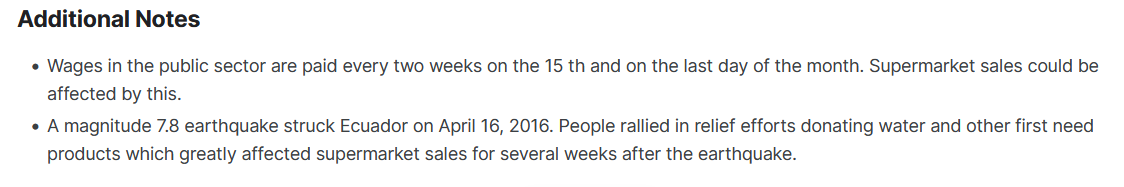


There are additional notes that were given to us from the dataset.
It said that the wages in the public sector are paid every two weeks on the 15th and on the last day of the month.

Another additional notes are an earthquake that happened in Ecuador around April 2016. But we can ignore this information because the dataset that we will train in our prediction/modeling has starting date in 2017-04-20.

In [34]:
data = merge_default_with_salesoilprices_add_lag_mediansalesoilprices_fourier_drop_encoded.copy()
data['payday'] = np.where(((data.day==15) | (data.date.dt.is_month_end)), 1, 0)
data = data.sort_values(by='date')
data.reset_index(inplace=True)
data = data.drop(['index'],axis=1)
data

,id,date,sales,onpromotion,oilprice,transactions,month,year,dayofyear,day,...,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,payday
0,163944,2013-04-03,4.0,0,95.02,1912.0,4,2013,93,3,...,0,0,0,0,1,0,0,0,0,0
1,165138,2013-04-03,0.0,0,95.02,0.0,4,2013,93,3,...,0,0,0,0,1,0,0,0,0,0
2,165137,2013-04-03,0.0,0,95.02,0.0,4,2013,93,3,...,0,0,0,0,1,0,0,0,0,0
3,165136,2013-04-03,0.0,0,95.02,0.0,4,2013,93,3,...,0,0,0,0,1,0,0,0,0,0
4,165135,2013-04-03,0.0,0,95.02,0.0,4,2013,93,3,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865451,3028205,2017-08-31,NaN,0,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1
2865452,3028204,2017-08-31,NaN,6,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1
2865453,3028203,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1
2865454,3028214,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1


Remember data that we will use for our forecasting started on 2017-04-20. 

So first we need to cut our data

In [35]:
start_date = '2017-04-20'

df_final = data[data['date']>start_date]

In [36]:
df_final

,id,date,sales,onpromotion,oilprice,transactions,month,year,dayofyear,day,...,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,payday
2628450,2793578,2017-04-21,52.658,0,49.64,971.0,4,2017,111,21,...,0,0,0,0,0,0,1,0,0,0
2628451,2793586,2017-04-21,1.000,0,49.64,1083.0,4,2017,111,21,...,0,0,0,0,0,0,1,0,0,0
2628452,2793585,2017-04-21,2485.000,28,49.64,1083.0,4,2017,111,21,...,0,0,0,0,0,0,1,0,0,0
2628453,2793584,2017-04-21,0.000,0,49.64,1083.0,4,2017,111,21,...,0,0,0,0,0,0,1,0,0,0
2628454,2793583,2017-04-21,0.000,0,49.64,1083.0,4,2017,111,21,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865451,3028205,2017-08-31,NaN,0,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1
2865452,3028204,2017-08-31,NaN,6,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1
2865453,3028203,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1
2865454,3028214,2017-08-31,NaN,1,47.26,0.0,8,2017,243,31,...,0,0,0,0,0,1,0,0,0,1


# Modeling (Prediction)

In [37]:
df_final.columns[:40]

Index(['id', 'date', 'sales', 'onpromotion', 'oilprice', 'transactions',
       'month', 'year', 'dayofyear', 'day', 'days_block_num',
       'month_block_num', 'national_holiday', 'sales_median',
       'oilprice_median', 'sales_median_month', 'sales_median_lag_20',
       'sales_median_lag_21', 'sales_median_lag_22', 'sales_median_lag_27',
       'sales_median_lag_28', 'sales_lag_20', 'sales_lag_21', 'sales_lag_22',
       'sales_lag_27', 'sales_lag_28', 'oilprice_lag_1', 'oilprice_lag_2',
       'oilprice_lag_3', 'oilprice_lag_7', 'oilprice_lag_14',
       'oilprice_lag_21', 'oilprice_median_lag_1', 'oilprice_median_lag_2',
       'oilprice_median_lag_3', 'oilprice_median_lag_6',
       'sales_median_month_lag_1', 'sales_median_month_lag_2',
       'sales_median_month_lag_3', 'sales_median_month_lag_6'],
      dtype='object')

In [38]:
import re
col_to_drop = ['id', 'date', 'sales', 'year', 'day', 'sales_median', 'month', 'oilprice_median', 'days_block_num', 'month_block_num', 'dayofyear']

X = df_final.copy()
X = X[(X.id<3000888)]
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X = X.drop(col_to_drop, axis='columns')
X

,onpromotion,oilprice,transactions,national_holiday,sales_median_month,sales_median_lag_20,sales_median_lag_21,sales_median_lag_22,sales_median_lag_27,sales_median_lag_28,...,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,payday
2628450,0,49.64,971.0,0.0,69.9530,132.7715,91.5375,68.821000,104.1875,76.7975,...,0,0,0,0,0,0,1,0,0,0
2628451,0,49.64,1083.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,0
2628452,28,49.64,1083.0,0.0,2885.0000,5126.5000,2937.5000,2115.500000,3906.5000,2635.0000,...,0,0,0,0,0,0,1,0,0,0
2628453,0,49.64,1083.0,0.0,3.0000,8.0000,3.0000,2.500000,4.0000,2.0000,...,0,0,0,0,0,0,1,0,0,0
2628454,0,49.64,1083.0,0.0,0.0000,0.0000,0.0000,0.000000,0.0000,0.0000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2836939,0,47.57,849.0,0.0,232.9255,232.3905,229.8090,233.789995,196.1105,205.7365,...,0,0,0,1,0,0,0,0,0,1
2836940,0,47.57,849.0,0.0,8.0000,6.0000,7.0000,6.500000,6.5000,6.5000,...,0,0,0,1,0,0,0,0,0,1
2836941,0,47.57,849.0,0.0,5.0000,3.5000,5.0000,5.500000,4.0000,4.0000,...,0,0,0,1,0,0,0,0,0,1
2836942,8,47.57,849.0,0.0,254.0000,203.5000,220.5000,276.000000,227.0000,228.0000,...,0,0,0,1,0,0,0,0,0,1


In [39]:
X.columns[:100]

Index(['onpromotion', 'oilprice', 'transactions', 'national_holiday',
       'sales_median_month', 'sales_median_lag_20', 'sales_median_lag_21',
       'sales_median_lag_22', 'sales_median_lag_27', 'sales_median_lag_28',
       'sales_lag_20', 'sales_lag_21', 'sales_lag_22', 'sales_lag_27',
       'sales_lag_28', 'oilprice_lag_1', 'oilprice_lag_2', 'oilprice_lag_3',
       'oilprice_lag_7', 'oilprice_lag_14', 'oilprice_lag_21',
       'oilprice_median_lag_1', 'oilprice_median_lag_2',
       'oilprice_median_lag_3', 'oilprice_median_lag_6',
       'sales_median_month_lag_1', 'sales_median_month_lag_2',
       'sales_median_month_lag_3', 'sales_median_month_lag_6', 'sin1freqWSUN',
       'cos1freqWSUN', 'sin2freqWSUN', 'cos2freqWSUN', 'sin3freqWSUN',
       'cos3freqWSUN', 'store_nbr_1', 'store_nbr_2', 'store_nbr_3',
       'store_nbr_4', 'store_nbr_5', 'store_nbr_6', 'store_nbr_7',
       'store_nbr_8', 'store_nbr_9', 'store_nbr_10', 'store_nbr_11',
       'store_nbr_12', 'store_nbr_13'

In [40]:
y = df_final[(df_final.id<3000888)]['sales']
y

2628450      52.658
2628451       1.000
2628452    2485.000
2628453       0.000
2628454       0.000
             ...   
2836939     172.517
2836940       3.000
2836941       3.000
2836942      93.000
2836943     762.000
Name: sales, Length: 208494, dtype: float64

In [41]:
X_to_predict = df_final[df_final.id>=3000888]
col_to_drop = ['date', 'sales', 'year', 'day', 'sales_median', 'month', 'oilprice_median', 'days_block_num', 'month_block_num', 'dayofyear']

X_to_predict = X_to_predict.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_to_predict = X_to_predict.drop(col_to_drop, axis='columns')

X_to_predict.sort_values(by=['id'], inplace=True)
X_to_predict

,id,onpromotion,oilprice,transactions,national_holiday,sales_median_month,sales_median_lag_20,sales_median_lag_21,sales_median_lag_22,sales_median_lag_27,...,cluster_16,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,payday
2838137,3000888,0,46.80,0.0,0.0,6.0000,6.0000,4.5000,4.5000,5.0000,...,0,0,0,0,1,0,0,0,0,0
2838136,3000889,0,46.80,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,1,0,0,0,0,0
2838135,3000890,2,46.80,0.0,0.0,4.0000,3.0000,3.0000,4.0000,3.0000,...,0,0,0,0,1,0,0,0,0,0
2838134,3000891,20,46.80,0.0,0.0,2856.5000,2336.0000,2396.5000,2577.5000,2548.0000,...,0,0,0,0,1,0,0,0,0,0
2838133,3000892,0,46.80,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864260,3029395,1,47.26,0.0,0.0,232.9255,288.3305,208.5745,199.6810,305.9620,...,0,0,0,0,0,1,0,0,0,1
2864259,3029396,0,47.26,0.0,0.0,68.1695,72.4160,58.6520,61.9080,66.0025,...,0,0,0,0,0,1,0,0,0,1
2864117,3029397,1,47.26,0.0,0.0,1546.0655,1451.3735,1151.0890,1344.1950,1591.5890,...,0,0,0,0,0,1,0,0,0,1
2864867,3029398,9,47.26,0.0,0.0,1.0000,1.0000,0.5000,1.0000,0.0000,...,0,0,0,0,0,1,0,0,0,1


We can compare every possible modeling method (for example, using Xgb, lightbm, randomforest, etc) using Cross-Validation and 'hyperparameter tuning' to find the best model to use to predict our data. But computation will take so much cost and time because we have a large amount of data (208494 rows × 155 columns).
So, to simplify this project, we will only use the basic ExtraTreesRegressor model to predict our data.

In [42]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from lightgbm import LGBMRegressor, log_evaluation


from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()

reg.fit(X,y)

ExtraTreesRegressor()

In [43]:
y_pred = reg.predict((X_to_predict.drop(['id'], axis='columns')))
y_pred[y_pred<0] = 0.0
y_pred


X_to_predict['sales'] = y_pred
X_to_predict

,id,onpromotion,oilprice,transactions,national_holiday,sales_median_month,sales_median_lag_20,sales_median_lag_21,sales_median_lag_22,sales_median_lag_27,...,cluster_17,dayofweek_0,dayofweek_1,dayofweek_2,dayofweek_3,dayofweek_4,dayofweek_5,dayofweek_6,payday,sales
2838137,3000888,0,46.80,0.0,0.0,6.0000,6.0000,4.5000,4.5000,5.0000,...,0,0,0,1,0,0,0,0,0,4.980000
2838136,3000889,0,46.80,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,0,0.020000
2838135,3000890,2,46.80,0.0,0.0,4.0000,3.0000,3.0000,4.0000,3.0000,...,0,0,0,1,0,0,0,0,0,7.610000
2838134,3000891,20,46.80,0.0,0.0,2856.5000,2336.0000,2396.5000,2577.5000,2548.0000,...,0,0,0,1,0,0,0,0,0,1657.682110
2838133,3000892,0,46.80,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0,0,0,1,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864260,3029395,1,47.26,0.0,0.0,232.9255,288.3305,208.5745,199.6810,305.9620,...,0,0,0,0,1,0,0,0,1,338.304240
2864259,3029396,0,47.26,0.0,0.0,68.1695,72.4160,58.6520,61.9080,66.0025,...,0,0,0,0,1,0,0,0,1,93.716700
2864117,3029397,1,47.26,0.0,0.0,1546.0655,1451.3735,1151.0890,1344.1950,1591.5890,...,0,0,0,0,1,0,0,0,1,1269.179299
2864867,3029398,9,47.26,0.0,0.0,1.0000,1.0000,0.5000,1.0000,0.0000,...,0,0,0,0,1,0,0,0,1,107.903450


In [44]:
X_after_predict = X_to_predict[['id', 'sales']] 
X_after_predict

,id,sales
2838137,3000888,4.980000
2838136,3000889,0.020000
2838135,3000890,7.610000
2838134,3000891,1657.682110
2838133,3000892,0.000000
...,...,...
2864260,3029395,338.304240
2864259,3029396,93.716700
2864117,3029397,1269.179299
2864867,3029398,107.903450


Don't forget to include our 'Zero Prediction' in our final prediction

In [45]:
X_after_predict = X_to_predict[['id', 'sales']] 
X_after_predict_zeropred = X_after_predict.merge(df_test, on=['id'], how='left')
zero_prediction_reset = zero_prediction.reset_index().drop(['index'], axis=1)
zero_prediction_reset.drop(['date'], axis=1, inplace=True)
zero_prediction_reset = zero_prediction_reset.drop_duplicates(keep='first')
X_after_predict_zeropred = X_after_predict_zeropred.merge(zero_prediction_reset,on=['store_nbr', 'family'], how='left')
X_after_predict_zeropred['sales_y'].fillna(X_after_predict_zeropred['sales_x'], inplace=True)
X_after_predict_zeropred = X_after_predict_zeropred.rename(columns={'sales_y': 'sales'})
X_final = X_after_predict_zeropred[['id', 'sales']]
X_final



,id,sales
0,3000888,4.980000
1,3000889,0.000000
2,3000890,7.610000
3,3000891,1657.682110
4,3000892,0.000000
...,...,...
28507,3029395,338.304240
28508,3029396,93.716700
28509,3029397,1269.179299
28510,3029398,107.903450


In [46]:
X_final.to_csv('submission.csv', index=False) #Save csv file for submission